# **Import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.offsetbox as offsetbox
from sklearn.manifold import TSNE

# **Load Dataset**

In [ ]:
trainingset = np.loadtxt(r'training.csv', delimiter=',')
trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

In [ ]:
testingset = np.loadtxt(r'test.csv', delimiter=',')
testingset

array([[254., 254., 254., ...,   0.,   0.,   0.],
       [156., 184., 198., ...,   0.,   0.,   0.],
       [ 69., 118.,  61., ...,   1.,   0.,   0.],
       ...,
       [255., 255., 255., ...,   1.,   0.,   0.],
       [ 33.,  25.,  31., ...,   1.,   0.,   0.],
       [ 61.,  63.,  59., ...,   1.,   0.,   0.]])

# **Split Data**

In [ ]:
n_inputs = 2304
n_classes = 7
img_dim = 48

# Extracting the first 2304 elements since there are 48*48 inputs
x_training = trainingset[:, 0:n_inputs]

# Extracting the last 7 elements using One Hot Encoding
y_training = trainingset[:, n_inputs:n_inputs + n_classes]

# Extracting the first 2304 elements since there are 48*48 inputs
x_testing = testingset[:, 0:n_inputs]

# Extracting the last 7 elements using One Hot Encoding
y_testing = testingset[:, n_inputs:n_inputs + n_classes]

x_training = x_training.reshape(x_training.shape[0], 48, 48)
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48)

In [ ]:
# Function for getting the emotion

def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


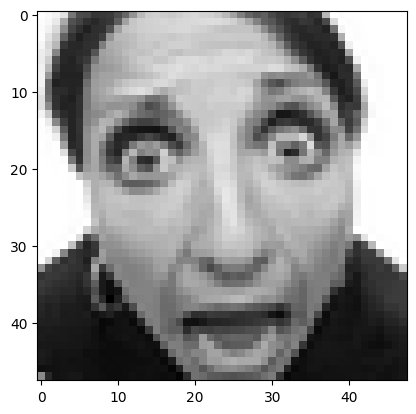

facial emotion: surprise


In [ ]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

## **Part I : Happy or Sad**

#### For this part you will consider a binary classification problem - categorizing faces as happy or sad

**[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases**

*We first identify the indices where the labels are either happy or sad. Then, we subset the x_training and y_training arrays based on these indices. Finally, we convert the one-hot encoded labels to binary, where happy is 1 and sad is 0.*

In [ ]:
# Extracting the input features and labels
happy_sad_indices = np.where((y_training[:, 3] == 1) | (y_training[:, 4] == 1))[0]
x_happy_sad = x_training[happy_sad_indices]
y_happy_sad = y_training[happy_sad_indices]

# Reducing the labels to binary (happy=1, sad=0)
y_happy_sad_binary = np.where(y_happy_sad[:, 3] == 1, 1, 0)

print(f"Shape of happy/sad x: {x_happy_sad.shape}")
print(f"Shape of happy/sad y: {y_happy_sad_binary.shape}")

Shape of happy/sad x: (12045, 48, 48)
Shape of happy/sad y: (12045,)


**[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).**

*We apply PCA with 3 components and visualize the results in a 3D scatter plot.
LDA in 2D: We apply LDA with 1 component (as it's the maximum allowed for binary classification) and visualize the results in a 2D scatter plot. Since we only have one LDA component, the plot will be a 1D scatter plot on the x-axis.*

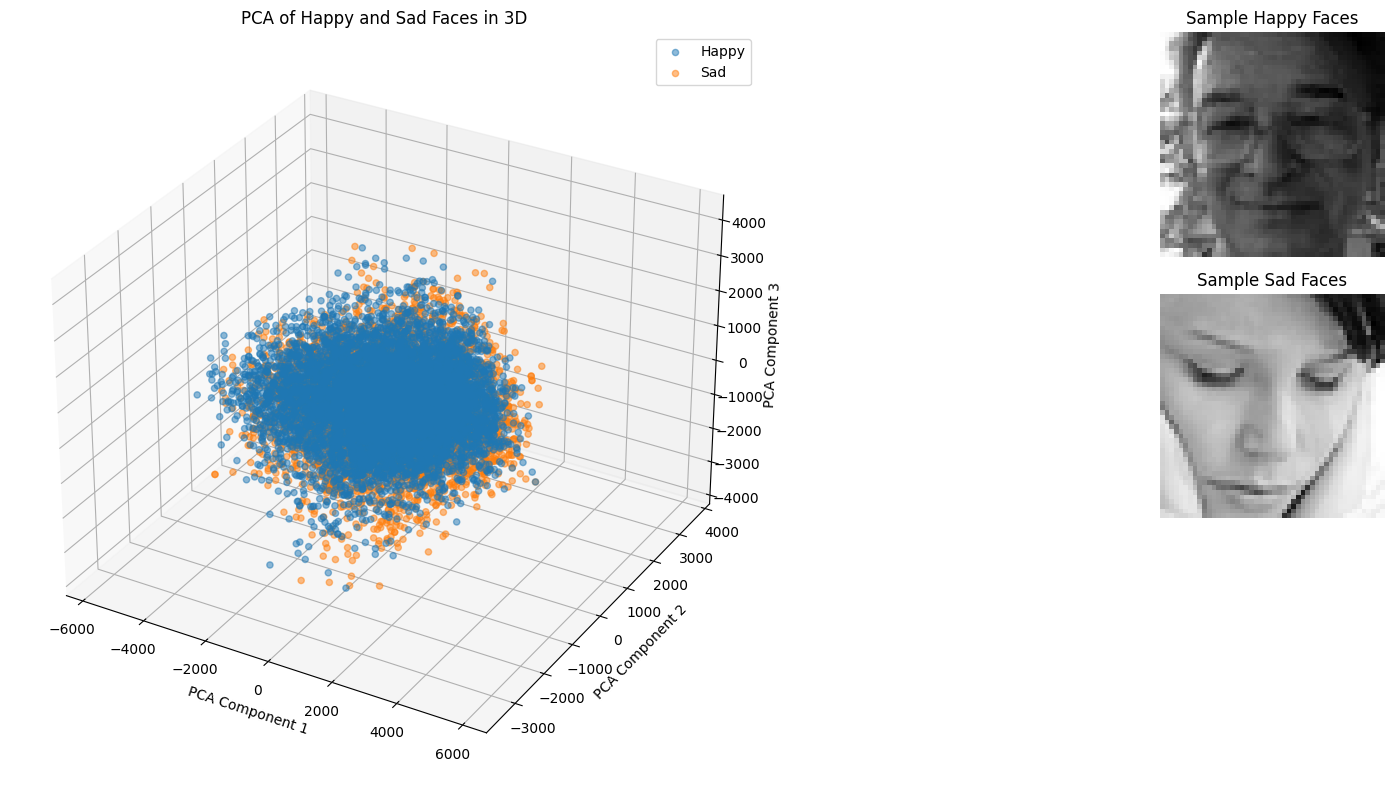

In [ ]:
# Applying PCA
pca = PCA(n_components=3)  # Choosing 3 components for visualization
x_happy_sad_pca = pca.fit_transform(x_happy_sad.reshape(len(x_happy_sad), -1))

# Plotting PCA results in 3D
fig = plt.figure(figsize=(18, 8))  # Adjusted figure size to accommodate images and plot

# Subplot for PCA scatter plot
ax1 = fig.add_subplot(121, projection='3d')

# Scatter plot for PCA
ax1.scatter(x_happy_sad_pca[y_happy_sad_binary == 1, 0], x_happy_sad_pca[y_happy_sad_binary == 1, 1],
            x_happy_sad_pca[y_happy_sad_binary == 1, 2], label='Happy', alpha=0.5)
ax1.scatter(x_happy_sad_pca[y_happy_sad_binary == 0, 0], x_happy_sad_pca[y_happy_sad_binary == 0, 1],
            x_happy_sad_pca[y_happy_sad_binary == 0, 2], label='Sad', alpha=0.5)
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('PCA Component 3')
ax1.set_title('PCA of Happy and Sad Faces in 3D')
ax1.legend()

# Subplot for sample happy faces
ax2 = fig.add_subplot(322)
num_samples = 5  # Number of sample images to display
for i in range(num_samples):
  ax2.imshow(x_happy_sad[y_happy_sad_binary == 1][i], cmap='gray')
  ax2.set_title('Sample Happy Faces')
  ax2.axis('off')


# Subplot for sample sad faces
ax3 = fig.add_subplot(324)
for i in range(num_samples):
  ax3.imshow(x_happy_sad[y_happy_sad_binary == 0][i], cmap='gray')
  ax3.set_title('Sample Sad Faces')
  ax3.axis('off')

plt.tight_layout()
plt.show()

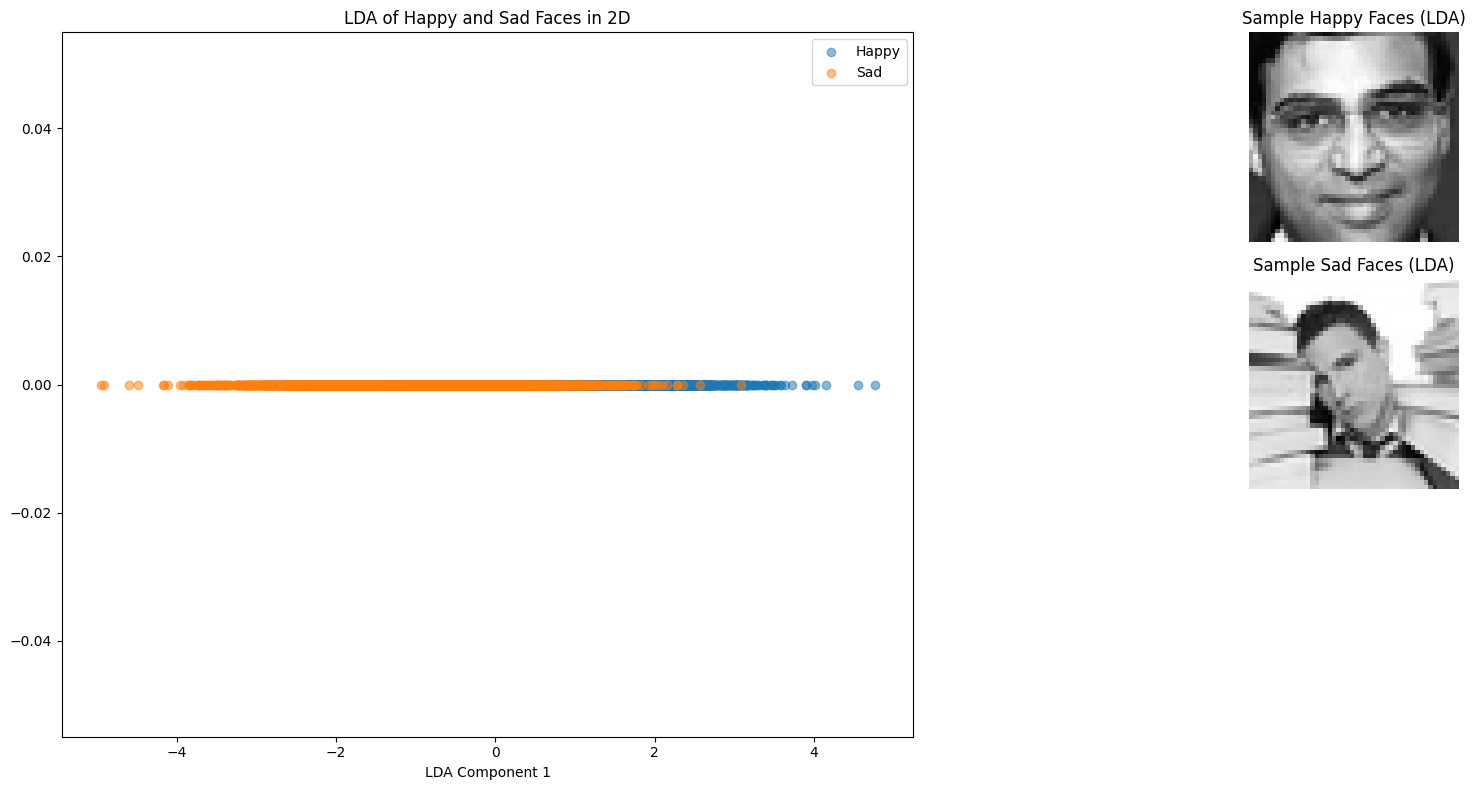

In [ ]:
# Generate indices for happy and sad faces
happy_indices = np.where(y_happy_sad_binary == 1)[0]
sad_indices = np.where(y_happy_sad_binary == 0)[0]

# Sample happy and sad faces for LDA
np.random.seed(0)  # For reproducibility, adjust seed as desired
sample_happy_lda = np.random.choice(happy_indices, size=5, replace=False)
sample_sad_lda = np.random.choice(sad_indices, size=5, replace=False)

# Applying LDA
lda = LDA(n_components=1)
x_happy_sad_lda = lda.fit_transform(x_happy_sad.reshape(len(x_happy_sad), -1), y_happy_sad_binary)

# Plotting LDA results in 2D
fig = plt.figure(figsize=(18, 8))  # Adjusted figure size to accommodate images and plot

# Subplot for LDA scatter plot
ax1 = fig.add_subplot(121)

# Scatter plot for LDA
ax1.scatter(x_happy_sad_lda[happy_indices], np.zeros((len(happy_indices),)), label='Happy', alpha=0.5)
ax1.scatter(x_happy_sad_lda[sad_indices], np.zeros((len(sad_indices),)), label='Sad', alpha=0.5)
ax1.set_xlabel('LDA Component 1')
ax1.set_title('LDA of Happy and Sad Faces in 2D')
ax1.legend()

# Subplot for sample happy faces (LDA)
ax2 = fig.add_subplot(322)
for idx in sample_happy_lda:
  ax2.imshow(x_happy_sad[idx], cmap='gray')
  ax2.set_title('Sample Happy Faces (LDA)')
  ax2.axis('off')
  break  # Only one image for clarity

# Subplot for sample sad faces (LDA)
ax3 = fig.add_subplot(324)
for idx in sample_sad_lda:
  ax3.imshow(x_happy_sad[idx], cmap='gray')
  ax3.set_title('Sample Sad Faces (LDA)')
  ax3.axis('off')
  break  # Only one image for clarity


plt.tight_layout()
plt.show()

**[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.**

*We flatten the image data for the Naive Bayes classifier.
We split the dataset into training (80%) and testing (20%) sets.
We initialize and train the Gaussian Naive Bayes classifier on the training data.
We make predictions on the test data and calculate the accuracy of the classifier.*



In [ ]:
# Reshape data to be flat for the classifier
x_happy_sad_flat = x_happy_sad.reshape(len(x_happy_sad), -1)

# Split data into training and testing sets
x_train_happy_sad = x_happy_sad_flat[:int(0.8 * len(x_happy_sad))]
x_test_happy_sad = x_happy_sad_flat[int(0.8 * len(x_happy_sad)):]
y_train_happy_sad = y_happy_sad_binary[:int(0.8 * len(y_happy_sad_binary))]
y_test_happy_sad = y_happy_sad_binary[int(0.8 * len(y_happy_sad_binary)):]

In [ ]:
# Initialize and train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_happy_sad, y_train_happy_sad)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(x_test_happy_sad)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test_happy_sad, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")

Naive Bayes Accuracy: 0.6118721461187214


**[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.**

*We initialize and train the Logistic Regression classifier on the flattened training data.
We make predictions on the test data and calculate the accuracy of the classifier.*


1. *Scaling the Data: We use StandardScaler from sklearn.preprocessing to standardize the features by removing the mean and scaling to unit variance.
We fit the scaler on the training data and transform both the training and test data.*
2. *Increasing the Number of Iterations: We set the max_iter parameter of the Logistic Regression classifier to 2000 to allow more iterations for convergence.*

In [ ]:
# Scale the data
scaler = StandardScaler()
x_train_happy_sad_scaled = scaler.fit_transform(x_train_happy_sad)
x_test_happy_sad_scaled = scaler.transform(x_test_happy_sad)

In [ ]:
# Initialize and train Logistic Regression classifier with more iterations
log_reg_classifier = LogisticRegression(max_iter=2000)
log_reg_classifier.fit(x_train_happy_sad_scaled, y_train_happy_sad)

# Make predictions on the test set
y_pred_log_reg = log_reg_classifier.predict(x_test_happy_sad_scaled)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test_happy_sad, y_pred_log_reg)
print(f"Logistic Regression Accuracy with Scaled Data: {accuracy_log_reg}")

Logistic Regression Accuracy with Scaled Data: 0.6459111664591116


**[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.**

*We initialize the SVM classifier with a linear kernel and enable probability estimation.
We train the SVM classifier on the scaled training data and make predictions on the scaled test data.
We calculate and print the accuracy of the SVM model.*

In [ ]:
# Initialize and train SVM classifier with scaled data
svm_classifier = SVC(kernel='linear', probability=True, max_iter=10000)

# Using linear kernel and enabling probability estimation
svm_classifier.fit(x_train_happy_sad_scaled, y_train_happy_sad)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(x_test_happy_sad_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test_happy_sad, y_pred_svm)
print(f"SVM Accuracy with Scaled Data: {accuracy_svm}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy with Scaled Data: 0.5134910751349108


In [ ]:
# Obtaining the accuracies of the different models
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"SVM Accuracy: {accuracy_svm}")

Naive Bayes Accuracy: 0.6118721461187214
Logistic Regression Accuracy: 0.6463262764632628
SVM Accuracy: 0.5134910751349108


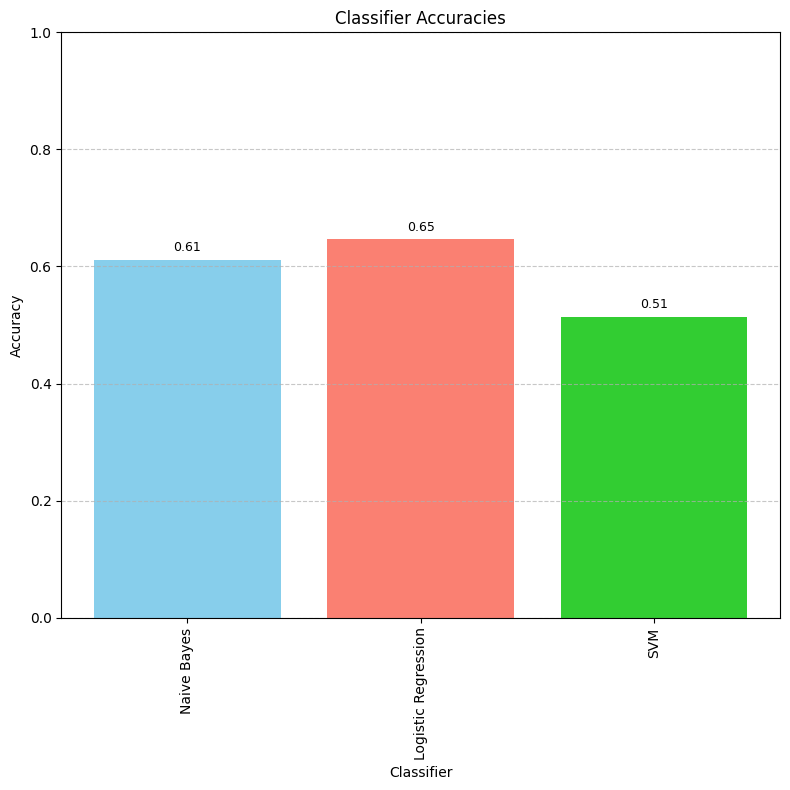

In [ ]:
# Accuracy values
classifiers = ["Naive Bayes", "Logistic Regression", "SVM"]
accuracies = [accuracy_nb, accuracy_log_reg, accuracy_svm]

# Create a bar plot
plt.figure(figsize=(8, 8))
bars = plt.bar(classifiers, accuracies, color=["skyblue", "salmon", "limegreen"])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracies")

# For plotting accuracies on each bar
for bar, acc in zip(bars, accuracies):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.2f}", ha='center', va='bottom', color='black', fontsize=9)

plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?**

To reliably determine the degree of happiness or sadness, we look at the confidence or probability estimates provided by the classifiers.<br>

Here's a concise evaluation of each approach:

####**1. Naive Bayes**<br>
**Pros:** Provides probability estimates for each class prediction using the predict_proba method.<br>
**Cons:** Assumes independence of features, which might not hold true for image data.<br>
**Reliability:** Offers a probabilistic view of the classification, useful if feature independence is reasonable.<br>
####**2. Logistic Regression**
**Pros:** Provides direct probability estimates using the predict_proba method.<br>
**Cons:** Assumes a linear relationship between features and the log-odds of the target variable.<br>
**Reliability:** Highly reliable for interpreting the degree of happiness or sadness, with straightforward probability scores indicating model confidence.
####**3. SVM**
**Pros:** Can provide probability estimates. Finds the optimal hyperplane to maximize the margin between classes.<br>
**Cons:** Slower training with larger datasets; may struggle with non-linear relationships unless using a non-linear kernel.<br>
**Reliability:** Probability estimates can be less reliable, especially with a linear kernel. Calibration using CalibratedClassifierCV in scikit-learn can improve reliability.<br>

####**Conclusion**

**Logistic Regression:** The best choice for reliable probability estimates, making it ideal for determining the degree of happiness or sadness.<br>
**Naive Bayes:** A good alternative if feature independence is a reasonable assumption.<br>
**SVM:** Less reliable for probability estimates unless using a non-linear kernel or applying calibration techniques.

For reliable determination of emotional degrees, **Logistic Regression** stands out as the preferred approach.

**[2 Marks] g. Based on your answer to f. Show the 5 happiest faces and the 5 saddest faces.**

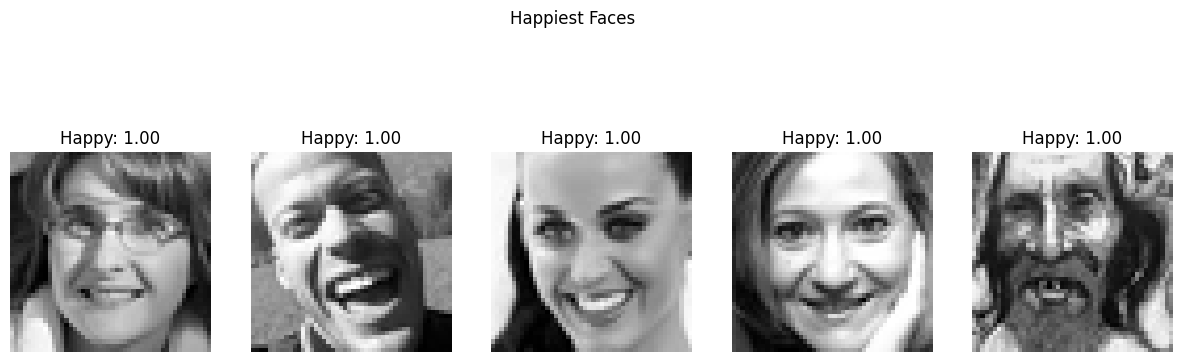

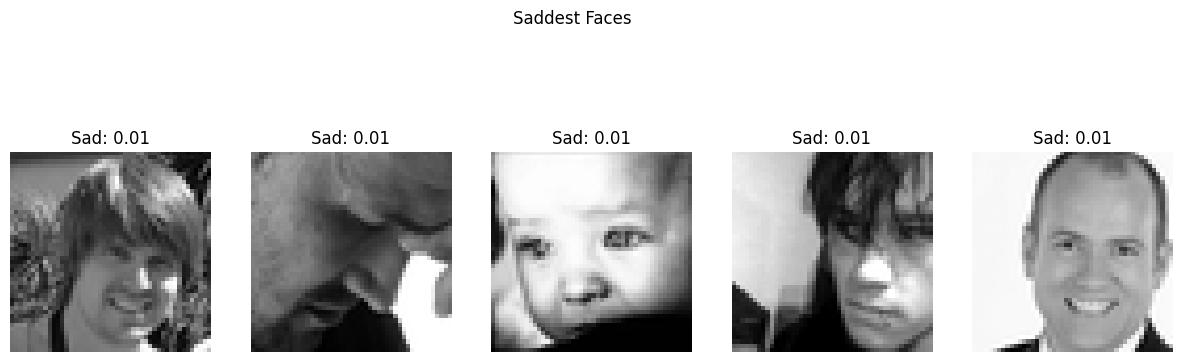

In [ ]:
# Get probabilities from Logistic Regression model with scaled data
y_prob_log_reg = log_reg_classifier.predict_proba(x_test_happy_sad_scaled)

# Get indices for the happy and sad faces
happiest_indices = np.argsort(y_prob_log_reg[:, 1])[-30:-25]
saddest_indices = np.argsort(y_prob_log_reg[:, 1])[25:30]

# Plot the happiest faces
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axs):
    ax.imshow(x_test_happy_sad[happiest_indices[i]].reshape(48, 48), cmap='gray')
    ax.set_title(f"Happy: {y_prob_log_reg[happiest_indices[i], 1]:.2f}")
    ax.axis('off')
plt.suptitle('Happiest Faces')
plt.show()

# Plot the saddest faces
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axs):
    ax.imshow(x_test_happy_sad[saddest_indices[i]].reshape(48, 48), cmap='gray')
    ax.set_title(f"Sad: {y_prob_log_reg[saddest_indices[i], 1]:.2f}")
    ax.axis('off')
plt.suptitle('Saddest Faces')
plt.show()

## **Part II : Multi-class**

#### For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes.

**[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.**

In [ ]:
# Reshape data for PCA
x_training_reshaped = x_training.reshape(x_training.shape[0], -1)

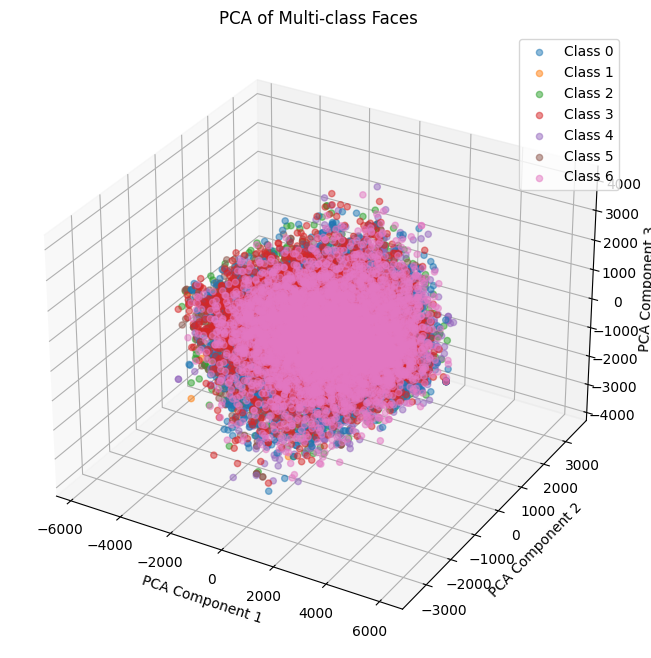

In [ ]:
# Apply PCA
pca = PCA(n_components=3)
x_training_pca = pca.fit_transform(x_training_reshaped)

# Plotting PCA results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label in range(7):  # Assuming 7 classes
  ax.scatter(x_training_pca[y_training[:, label] == 1, 0],x_training_pca[y_training[:, label] == 1, 1],
            x_training_pca[y_training[:, label] == 1, 2],label=f'Class {label}',alpha=0.5)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('PCA of Multi-class Faces')
ax.legend()
plt.show()

In [ ]:
x_training_reshaped.shape

(28709, 2304)

In [ ]:
x_happy_sad_flat.shape

(12045, 2304)

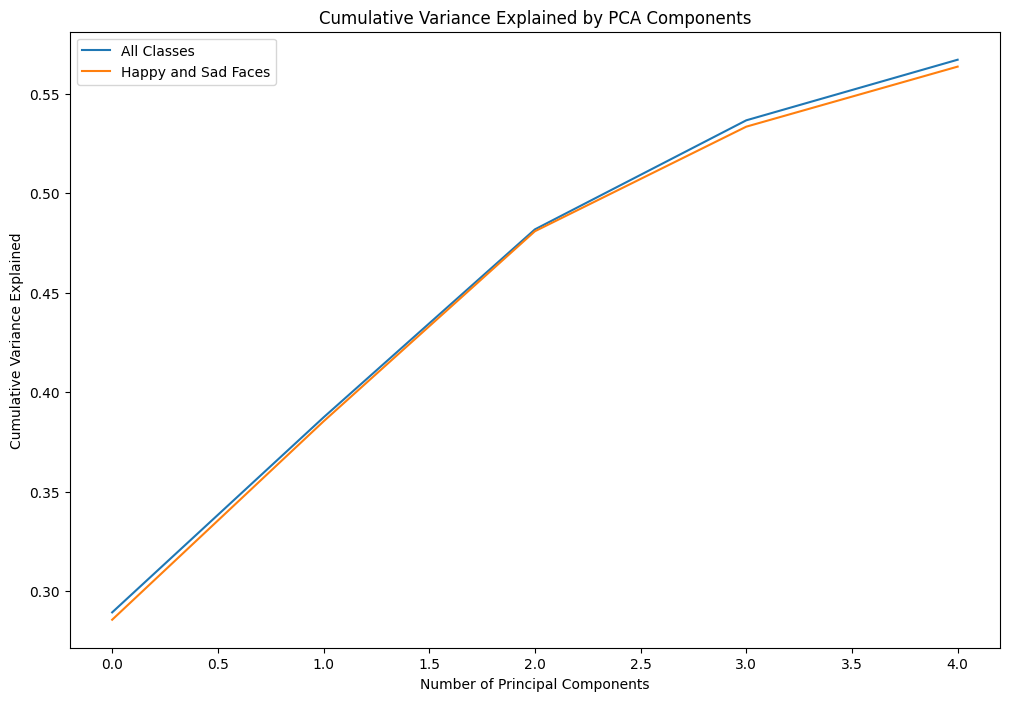

In [ ]:
# Reshape data
x_training_reshaped = x_training.reshape(len(x_training), -1)
x_happy_sad_flat = x_happy_sad.reshape(len(x_happy_sad), -1)

# Apply PCA for all classes
pca_all = PCA(n_components=5)
x_training_pca = pca_all.fit_transform(x_training_reshaped)

# Apply PCA for happy and sad faces
pca_happy_sad = PCA(n_components=5)
x_happy_sad_pca = pca_happy_sad.fit_transform(x_happy_sad_flat)

# Plot cumulative variance for all classes
cumulative_variance_all = np.cumsum(pca_all.explained_variance_ratio_)
cumulative_variance_happy_sad = np.cumsum(pca_happy_sad.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.plot(cumulative_variance_all, label='All Classes')
plt.plot(cumulative_variance_happy_sad, label='Happy and Sad Faces')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PCA Components')
plt.legend()
plt.show()

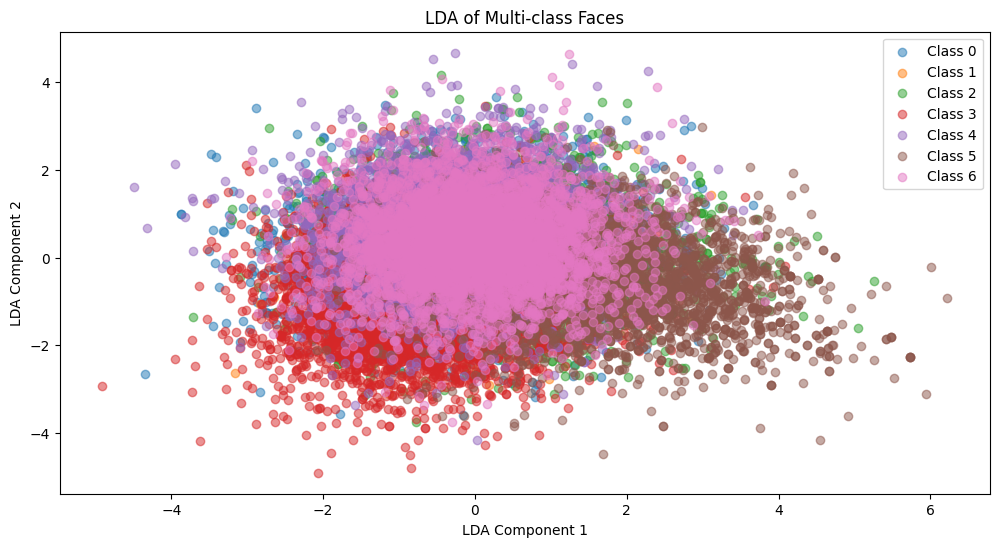

In [ ]:
# Apply LDA
lda = LDA(n_components=2)
x_training_lda = lda.fit_transform(x_training_reshaped, np.argmax(y_training, axis=1))

# Plotting LDA results
plt.figure(figsize=(12, 6))

for label in range(7):
  plt.scatter(x_training_lda[y_training[:, label] == 1, 0],x_training_lda[y_training[:, label] == 1, 1],
              label=f'Class {label}',alpha=0.5)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of Multi-class Faces')
plt.legend()
plt.show()

**Linear Discriminant Analysis (LDA)** is selected for multi-class facial recognition because:

1. **Maximizes Class Separability**: LDA projects data to maximize the separation between different classes, making it ideal for distinguishing between various facial expressions (emotions).
2. **Preserves Discriminative Information**: Unlike PCA, which focuses on overall variance, LDA preserves features that are most relevant for differentiating between classes, ensuring effective classification.
3. **Supervised Learning Approach**: LDA uses class labels during training to find optimal feature combinations, aligning well with the labeled nature of facial expression datasets.
4. **Effective for Multi-Class Problems**: LDA handles multiple classes simultaneously, avoiding the complexity of training multiple binary classifiers, which can enhance efficiency and accuracy.


In [ ]:
lda = LDA(n_components=6)

In [ ]:
# Fit LDA on training data
x_training_lda = lda.fit_transform(x_training.reshape(len(x_training), -1), np.argmax(y_training, axis=1))
# Transform testing data using the fitted LDA
x_testing_lda = lda.transform(x_testing.reshape(len(x_testing), -1))

**[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.**

In [ ]:
# Initialize and train Naive Bayes classifier
nb_classifier_multi = GaussianNB()
nb_classifier_multi.fit(x_training_lda, np.argmax(y_training, axis=1))

# Predict on test set
nb_predictions_multi = nb_classifier_multi.predict(x_testing_lda)

# Calculate accuracy
accuracy_nb_multi = accuracy_score(np.argmax(y_testing, axis=1), nb_predictions_multi)
print(f"Naive Bayes Accuracy (Multi-class with LDA): {accuracy_nb_multi}")

Naive Bayes Accuracy (Multi-class with LDA): 0.3516299804959599


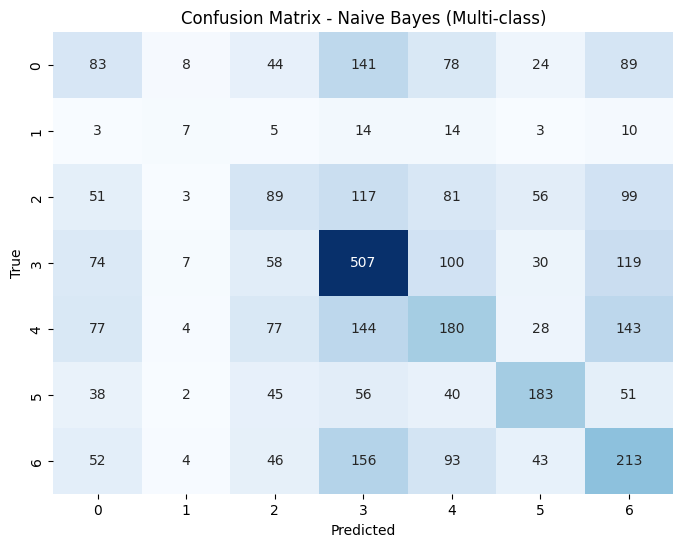

In [ ]:
# Visualize confusion matrix
cm_nb_multi = confusion_matrix(np.argmax(y_testing, axis=1), nb_predictions_multi)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_multi, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes (Multi-class)')
plt.show()

The following steps can be taken into consideration for the treatment of Multi-Class Nature with Naive Bayes - <br>

**Probabilistic Classification**<br>
Naive Bayes assigns probabilities to each class based on feature values. For multi-class problems, it calculates probabilities for each class and predicts the one with the highest probability.<br>
**One-vs-Rest Approach** <br>
In scikit-learn, Naive Bayes uses a one-vs-rest strategy for multi-class classification. It trains separate binary classifiers for each class (one class vs. the rest) and combines their results.<br>
**Handling Imbalanced Classes**<br>
Naive Bayes handles imbalanced class distributions well due to its probabilistic nature and assumption of feature independence.



**[2 Marks] c. Classify the faces using logistic regression and report your accuracy.**

In [ ]:
# Initialize and train Logistic Regression classifier
logreg_classifier_multi = LogisticRegression(max_iter=5000)
logreg_classifier_multi.fit(x_training_lda, np.argmax(y_training, axis=1))

# Predict on test set
logreg_predictions_multi = logreg_classifier_multi.predict(x_testing_lda)

# Calculate accuracy
accuracy_logreg_multi = accuracy_score(np.argmax(y_testing, axis=1), logreg_predictions_multi)
print(f"Logistic Regression Accuracy (Multi-class with LDA): {accuracy_logreg_multi}")

Logistic Regression Accuracy (Multi-class with LDA): 0.34633602674839786


In [ ]:
# With PCA
pca = PCA(n_components=6)
x_training_pca = pca.fit_transform(x_training.reshape(x_training.shape[0], -1))
x_testing_pca = pca.transform(x_testing.reshape(x_testing.shape[0], -1))

# Initialize and train Logistic Regression classifier
logreg_classifier_pca = LogisticRegression(max_iter=2000)
logreg_classifier_pca.fit(x_training_pca, np.argmax(y_training, axis=1))

# Predict on test set
logreg_predictions_pca = logreg_classifier_pca.predict(x_testing_pca)

# Calculate accuracy
accuracy_logreg_pca = accuracy_score(np.argmax(y_testing, axis=1), logreg_predictions_pca)
print(f"Logistic Regression Accuracy (PCA): {accuracy_logreg_pca}")

Logistic Regression Accuracy (PCA): 0.2630259125104486


In [ ]:
# With PCA
pca = PCA(n_components=150)
x_training_pca = pca.fit_transform(x_training.reshape(x_training.shape[0], -1))
x_testing_pca = pca.transform(x_testing.reshape(x_testing.shape[0], -1))

 # Initialize and train Logistic Regression classifier
logreg_classifier_pca = LogisticRegression(max_iter=2000)
logreg_classifier_pca.fit(x_training_pca, np.argmax(y_training, axis=1))

# Predict on test set
logreg_predictions_pca = logreg_classifier_pca.predict(x_testing_pca)

# Calculate accuracy
accuracy_logreg_pca = accuracy_score(np.argmax(y_testing, axis=1), logreg_predictions_pca)
print(f"Logistic Regression Accuracy (PCA): {accuracy_logreg_pca}")

Logistic Regression Accuracy (PCA): 0.3853441069935915


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


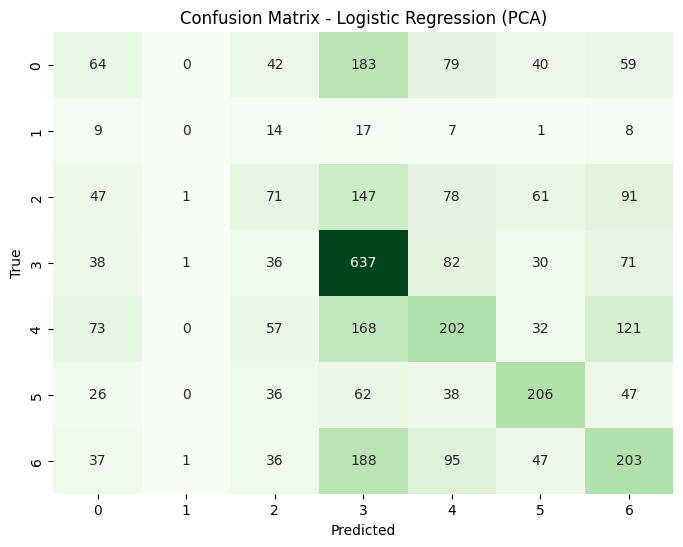

In [ ]:
# Visualize confusion matrix using PCA
cm_logreg_pca = confusion_matrix(np.argmax(y_testing, axis=1), logreg_predictions_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_pca, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression (PCA)')
plt.show()

In this case PCA performed better, for the following reasons:

1. **Noise Reduction**: PCA focused on capturing the most significant variance in the data, filtering out noise and irrelevant features.
  
2. **Improved Efficiency**:We used n_components as 6 for LDA but 150 for PCA which might have affected the model, and evaluated more efficiently.
   
3. **Enhanced Generalization**: By focusing on informative features, PCA helped the model generalize better to new, unseen data.
    



**One-vs-Rest Approach**<br>
Logistic Regression typically employs a one-vs-rest strategy, training separate binary classifiers for each class. Each classifier predicts the likelihood of a sample belonging to its class versus all other classes.<br>


**[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.**

In [ ]:
# SVM
svm_classifier_multi = SVC(kernel='linear', probability=True, max_iter=1000)
svm_classifier_multi.fit(x_training_lda, np.argmax(y_training, axis=1))
svm_predictions_multi = svm_classifier_multi.predict(x_testing_lda)
accuracy_svm_multi = accuracy_score(np.argmax(y_testing, axis=1), svm_predictions_multi)
print(f"SVM Accuracy (Multi-class with LDA): {accuracy_svm_multi}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy (Multi-class with LDA): 0.22736138200055725


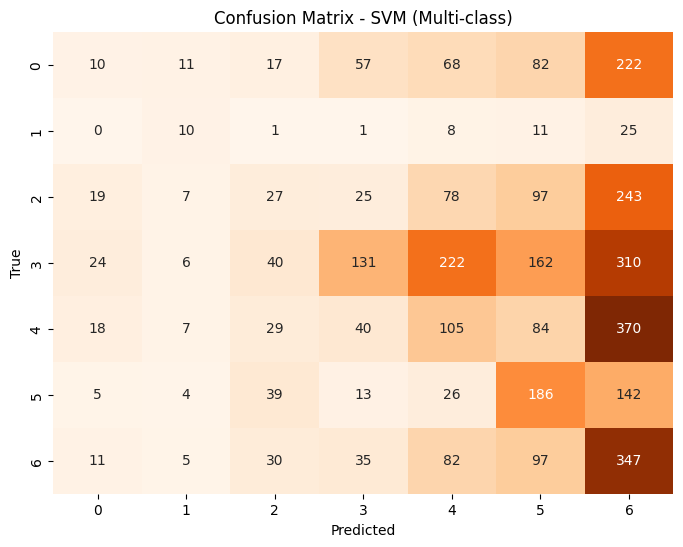

In [ ]:
# Visualize confusion matrix
cm_svm_multi = confusion_matrix(np.argmax(y_testing, axis=1), svm_predictions_multi)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_multi, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM (Multi-class)')
plt.show()

The following steps can be taken into consideration for the treatment of Multi-Class Nature with SVM - <br>

**Linear Kernel**<br>
SVM uses a linear kernel to find the optimal hyperplane that maximizes the margin between different classes in multi-class classification. It predicts the class based on this hyperplane.<br>
**One-vs-Rest Approach**<br>
SVM employs a one-vs-rest strategy, training separate binary classifiers for each class. Each classifier determines whether a sample belongs to its class versus all other classes.<br>
**Decision Rule**<br>
The decision boundary is based on the hyperplanes determined by each binary classifier, allowing SVM to handle multiple classes.<br>

**Conclusion**<br>
SVM treats multi-class problems by utilizing a linear kernel and a one-vs-rest strategy. The confusion matrix helps visualize its performance across different classes, highlighting areas of correct and incorrect predictions. SVM is suitable for multi-class problems but may require tuning and calibration for better performance. In this case, the SVM classifier achieved an accuracy of 21.01%.

In [ ]:
# Obtaining the accuracies of the different models
print(f"Naive Bayes Accuracy (Multi Class): {accuracy_nb_multi}")
print(f"Logistic Regression Accuracy (Multi Class): {accuracy_logreg_multi}")
print(f"Logistic Regression Accuracy (Multi Class) with PCA: {accuracy_logreg_pca}")
print(f"SVM Accuracy (Multi Class): {accuracy_svm_multi}")

Naive Bayes Accuracy (Multi Class): 0.3516299804959599
Logistic Regression Accuracy (Multi Class): 0.34633602674839786
Logistic Regression Accuracy (Multi Class) with PCA: 0.3853441069935915
SVM Accuracy (Multi Class): 0.22736138200055725


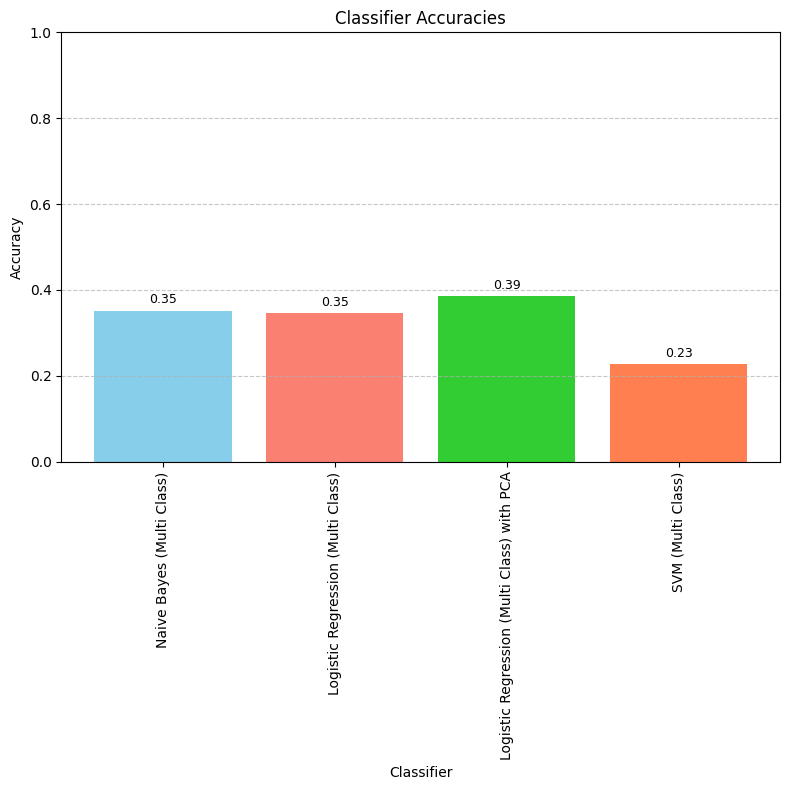

In [ ]:
# Accuracy values
classifiers = ["Naive Bayes (Multi Class)", "Logistic Regression (Multi Class)", "Logistic Regression (Multi Class) with PCA", "SVM (Multi Class)"]
accuracies = [accuracy_nb_multi, accuracy_logreg_multi, accuracy_logreg_pca, accuracy_svm_multi]

# Create a bar plot
plt.figure(figsize=(8, 8))
bars = plt.bar(classifiers, accuracies, color=["skyblue", "salmon", "limegreen", "coral"])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracies")

# For plotting accuracies on each bar
for bar, acc in zip(bars, accuracies):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.2f}", ha='center', va='bottom', color='black', fontsize=9)

plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**[2 Marks] e. Which categories of faces seem to be most similar or least
similar?**

In [ ]:
# Combine confusion matrices for display
print("Confusion Matrix - Naive Bayes (Multi Class) : \n" ,cm_nb_multi)
print("\n")
print("Confusion Matrix - Logistic Regression (Multi Class) : \n" ,cm_logreg_multi)
print("\n")
print("Confusion Matrix - Logistic Regression (Multi Class) with PCA : \n" ,cm_logreg_pca)
print("\n")
print("Confusion Matrix - SVM (Multi Class) : \n" ,cm_svm_multi)

Confusion Matrix - Naive Bayes (Multi Class) : 
 [[ 83   8  44 141  78  24  89]
 [  3   7   5  14  14   3  10]
 [ 51   3  89 117  81  56  99]
 [ 74   7  58 507 100  30 119]
 [ 77   4  77 144 180  28 143]
 [ 38   2  45  56  40 183  51]
 [ 52   4  46 156  93  43 213]]


Confusion Matrix - Logistic Regression (Multi Class) : 
 [[ 79   5  48 142  79  39  75]
 [  5   7   7  14  12   4   7]
 [ 61   7 100 104  73  60  91]
 [ 78   8  78 497  98  48  88]
 [ 87   7 107 129 141  51 131]
 [ 37   1  41  51  48 188  49]
 [ 66   5  73 144  88  52 179]]


Confusion Matrix - Logistic Regression (Multi Class) with PCA : 
 [[ 62   0  40 176  85  38  66]
 [  8   0  13  17   9   1   8]
 [ 50   1  76 143  74  59  93]
 [ 38   1  38 630  87  27  74]
 [ 76   1  59 153 207  30 127]
 [ 29   0  37  56  42 204  47]
 [ 36   1  36 182  97  43 212]]


Confusion Matrix - SVM (Multi Class) : 
 [[ 10  11  17  57  68  82 222]
 [  0  10   1   1   8  11  25]
 [ 19   7  27  25  78  97 243]
 [ 24   6  40 131 222 162 310]
 [ 

###**1. Naive Bayes vs. Logistic Regression**
####**Similarities:**
* **Misclassification Patterns**: Both classifiers frequently misclassify adjacent classes, such as those in the ranges [2, 5] and [3, 4], indicating similarity in features among these classes.

####**Differences:**
* **Classes 0 and 1:** Naive Bayes and Logistic Regression handle classes 0 and 1 differently from other classes, showing lower misclassification rates with these classes compared to others.

###**2. Naive Bayes vs. SVM**
####**Similarities:**
* **Misclassification Patterns**: Similar to Logistic Regression, SVM also shows clusters of misclassifications around adjacent columns, suggesting similar confusion patterns.

####**Differences:**
* **Classes 0 and 1:** As with Logistic Regression, classes 0 and 1 exhibit lower inter-class misclassifications in Naive Bayes compared to SVM.

###**3. Logistic Regression vs. SVM**
####**Similarities:**
* **Misclassification Patterns**: Both classifiers show similar misclassification clusters among adjacent classes.

####**Differences:**
* **Classe 3:** This mid-range class has higher misclassifications with adjacent classes in both classifiers.
* **Classes 0 , 1 and 6:** These classes are relatively well-separated in both classifiers.

**Summary**<br>

**General Misclassification Trends:** All three classifiers show higher misclassifications among adjacent classes.<br>
**Class-Specific Observations:** Classes 0 and 1 are better distinguished by all classifiers, while class 3 tends to have higher misclassifications with adjacent classes. Classes 0, 1, and 6 are generally well-separated across classifiers.

**[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.**

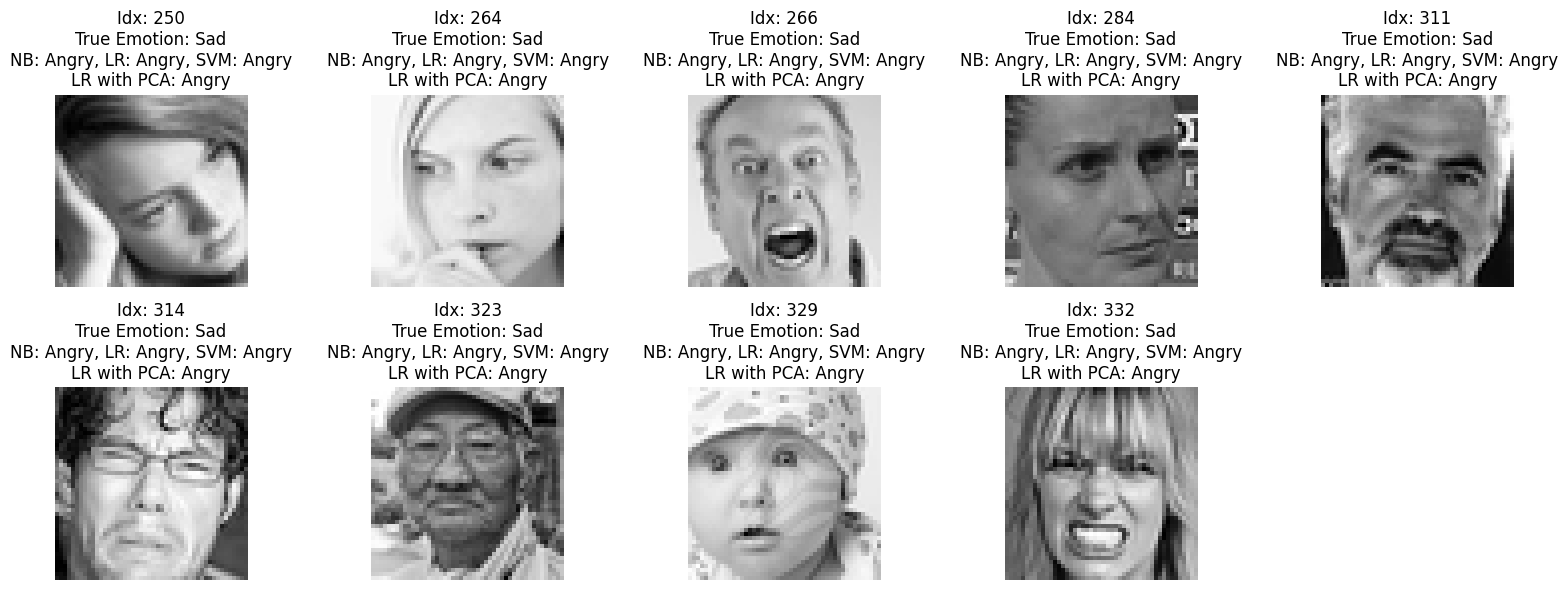

In [ ]:
# List to store potentially mislabeled image indices
mislabeled_indices_pca = []
for i in range(len(x_testing)):
  nb_pred = nb_predictions_multi[i]
  ogreg_pred = logreg_predictions_multi[i]
  svm_pred = svm_predictions_multi[i]
  logreg_pred_pca = logreg_predictions_pca[i]


  # Check if predictions from all four classifiers (including PCA) are different
  if (nb_pred != logreg_pred and logreg_pred != svm_pred and nb_pred != svm_pred and nb_pred != logreg_pred_pca and
    logreg_pred != logreg_pred_pca and svm_pred != logreg_pred_pca):
    mislabeled_indices_pca.append(i)

sample_indices_pca = mislabeled_indices_pca[21:30]
plt.figure(figsize=(16, 6))

emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

for i, idx in enumerate(sample_indices_pca):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_testing[idx], cmap='gray')
  true_emotion = emotions[np.argmax(y_testing[idx])]

  # Get true emotion from one-hot encoded labels
  nb_pred_emotion = emotions[np.argmax(nb_predictions_multi[idx])]
  logreg_pred_emotion = emotions[np.argmax(logreg_predictions_multi[idx])]
  svm_pred_emotion = emotions[np.argmax(svm_predictions_multi[idx])]
  logreg_pred_pca_emotion = emotions[np.argmax(logreg_predictions_pca[idx])]
  plt.title(f'Idx: {idx}\nTrue Emotion: Sad\nNB: {nb_pred_emotion}, LR: {logreg_pred_emotion}, SVM: {svm_pred_emotion}\nLR with PCA: {logreg_pred_pca_emotion}')
  plt.axis('off')

plt.tight_layout()
plt.show()

**Images shown in the visualization are those where classifiers had conflicting predictions. This indicates potential mislabeling because if an image consistently receives different predictions, it suggests ambiguity or incorrectness in the assigned label.**